> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

Introduction

###Dataset Description 

 In this project I would be investigating and analysing data associated with movies collected from the movies database which includes vote count, user rating and revenue.I would be particularly interested in finding revenue performance compared to the movies budget and in comparism with the vote count  and genre



 homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
1)How does the revenue perform compared to the movies budget
2)Which revenue had the higest vote count
3)Which movie genre had the highest vote count and revenue.




>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import os
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

Here I inspected the data to understand the structure and figure out if there will be any changes to be made,as irregular and inconsistent data could give us misleading reports 

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movies=pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df_movies.shape

(10866, 21)

from the code lines above above which shows the dataset shape, we can see that there are 10,866 rows and 21 columns in this dataset

The code below describes the numerical attributes in this dataset,emphasis on the statistical characteristics

In [5]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The code above shows the basic dataset information

In [7]:
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The code above shows the total number of nulls in each column within the data set,with productioncompanies,genre,director,cast,homepage,tagline,keywords having a high number of null values


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


We start data cleaning by checking for duplicate and removing duplicate values,rows,columns

In [9]:
sum(df_movies.duplicated())

1

In [10]:
df_movies.drop_duplicates(inplace=True)

In [11]:
sum(df_movies.duplicated())

0

The code below shows us a new summary of the information contained in our dataset

In [12]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

The code below shows when I dropped the coulmns that I thought were not necessary

In [13]:
df_movies.drop(['keywords','tagline','homepage','imdb_id'],axis=1,inplace=True)

Next we check for null vaues in our data set and either replace them or drop them

In [14]:
sum(df_movies.cast.isnull())

76

In [15]:
df_movies.cast.head()

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4    Vin Diesel|Paul Walker|Jason Statham|Michelle ...
Name: cast, dtype: object

In [16]:
df_movies.cast.fillna('N/A',inplace=True)

The code below shows the total number of nulls in the cast column

In [17]:
sum(df_movies.cast.isnull())

0

In [18]:
df_movies.cast.replace([' ','-',],'_',inplace=True,regex=True)

Here I replaced space and hyphen with underscores, this will further clean the dataset

In [19]:
df_movies.cast.head()

0    Chris_Pratt|Bryce_Dallas_Howard|Irrfan_Khan|Vi...
1    Tom_Hardy|Charlize_Theron|Hugh_Keays_Byrne|Nic...
2    Shailene_Woodley|Theo_James|Kate_Winslet|Ansel...
3    Harrison_Ford|Mark_Hamill|Carrie_Fisher|Adam_D...
4    Vin_Diesel|Paul_Walker|Jason_Statham|Michelle_...
Name: cast, dtype: object

In [20]:
df_movies['cast']=df_movies['cast'].apply(lambda x: x.split('|'))

In [21]:
df_movies.cast.head()

0    [Chris_Pratt, Bryce_Dallas_Howard, Irrfan_Khan...
1    [Tom_Hardy, Charlize_Theron, Hugh_Keays_Byrne,...
2    [Shailene_Woodley, Theo_James, Kate_Winslet, A...
3    [Harrison_Ford, Mark_Hamill, Carrie_Fisher, Ad...
4    [Vin_Diesel, Paul_Walker, Jason_Statham, Miche...
Name: cast, dtype: object

In [22]:
sum(df_movies.director.isnull())

44

In [23]:
df_movies.director.head()

0     Colin Trevorrow
1       George Miller
2    Robert Schwentke
3         J.J. Abrams
4           James Wan
Name: director, dtype: object

In [24]:
df_movies.director.fillna('N/A',inplace=True)

In [25]:
sum(df_movies.director.isnull())

0

After cleaning the null values,we recheck the dataset for null values again, the code above shows the total number of nulls in the  director coloumn

In [26]:
df_movies.director.replace([' ','-',],'_',inplace=True,regex=True)

In [27]:
df_movies.director.head()

0     Colin_Trevorrow
1       George_Miller
2    Robert_Schwentke
3         J.J._Abrams
4           James_Wan
Name: director, dtype: object

In [28]:
df_movies.groupby('director').sum()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,,
A.R._Murugadoss,14070,0.215030,9100000,76000000,183,53,6.9,2008,9.216358e+06,7.697178e+07
A._Todd_Smith,370687,1.876037,0,0,0,11,5.4,2015,0.000000e+00,0.000000e+00
Aaron_Aites,36124,0.108700,0,0,93,13,6.5,2008,0.000000e+00,0.000000e+00
Aaron_Blaise|Robert_Walker,10009,1.653031,100000000,250,85,753,6.8,2003,1.185353e+08,2.963382e+02
Aaron_Hann|Mario_Miscione,335866,0.350599,0,0,87,167,6.1,2015,0.000000e+00,0.000000e+00
Aaron_Harvey,75736,1.212003,7000000,0,93,71,4.9,2011,6.785786e+06,0.000000e+00
Aaron_Katz|Martha_Stephens,252102,0.267446,0,0,96,17,5.8,2014,0.000000e+00,0.000000e+00
Aaron_Keeling|Austin_Keeling,326247,0.078363,0,0,111,10,3.8,2015,0.000000e+00,0.000000e+00
Aaron_Moorhead|Justin_Benson,241855,0.383406,0,49970,109,110,6.5,2015,0.000000e+00,4.597238e+04


The code above groups the movie dataset by directors to see each directors earnings  

In [29]:
df_movies.groupby('director')[['vote_count']].mean().head()

,vote_count
director,
A.R._Murugadoss,53.0
A._Todd_Smith,11.0
Aaron_Aites,13.0
Aaron_Blaise|Robert_Walker,753.0
Aaron_Hann|Mario_Miscione,167.0


Above code shows first 5 set of directors with their vote_count,and I further sorted the movies dataset director against vote_count column below in ascending order.

In [30]:
df_movies.groupby('director')[['vote_count']].mean().sort_values(['vote_count'],ascending=False).head()

,vote_count
director,
Bob_Peterson|Pete_Docter,4225.0
Don_Hall|Chris_Williams,4185.0
Christopher_Nolan,4175.9
Pierre_Coffin|Chris_Renaud,4143.5
Pete_Docter,3935.0


In [31]:
sum(df_movies.production_companies.isnull())

1030

In [32]:
df_movies.production_companies.fillna('N/A',inplace=True)

In [33]:
sum(df_movies.production_companies.isnull())

0

In [34]:
df_movies.production_companies.head()

0    Universal Studios|Amblin Entertainment|Legenda...
1    Village Roadshow Pictures|Kennedy Miller Produ...
2    Summit Entertainment|Mandeville Films|Red Wago...
3            Lucasfilm|Truenorth Productions|Bad Robot
4    Universal Pictures|Original Film|Media Rights ...
Name: production_companies, dtype: object

In [35]:
df_movies.production_companies.replace([' ','-',],'_',inplace=True,regex=True)

In [36]:
df_movies.production_companies.head()

0    Universal_Studios|Amblin_Entertainment|Legenda...
1    Village_Roadshow_Pictures|Kennedy_Miller_Produ...
2    Summit_Entertainment|Mandeville_Films|Red_Wago...
3            Lucasfilm|Truenorth_Productions|Bad_Robot
4    Universal_Pictures|Original_Film|Media_Rights_...
Name: production_companies, dtype: object

In [37]:
df_movies['production_companies']=df_movies['production_companies'].apply(lambda x: x.split('|'))

In [38]:
df_movies.production_companies.head()

0    [Universal_Studios, Amblin_Entertainment, Lege...
1    [Village_Roadshow_Pictures, Kennedy_Miller_Pro...
2    [Summit_Entertainment, Mandeville_Films, Red_W...
3        [Lucasfilm, Truenorth_Productions, Bad_Robot]
4    [Universal_Pictures, Original_Film, Media_Righ...
Name: production_companies, dtype: object

In [39]:
sum(df_movies.genres.isnull())

23

In [40]:
df_movies.genres.head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

From the above we the genre column is a string object and as such we cannot replace missing values with mean,mode or median values, so we instead replace with string like 'N/A'

In [41]:
df_movies.genres.fillna('N/A',inplace=True)

In [42]:
sum(df_movies.genres.isna())

0

next we replace the genre column which has whitespace with underscore

In [43]:
df_movies.genres.replace([' ','-',],'_',inplace=True,regex=True)

In [44]:
df_movies.genres.head()

0    Action|Adventure|Science_Fiction|Thriller
1    Action|Adventure|Science_Fiction|Thriller
2           Adventure|Science_Fiction|Thriller
3     Action|Adventure|Science_Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

We further clean the genre column by removing the '|' character and by changing each row to a list of strings characters 

In [45]:
df_movies['genres']=df_movies['genres'].apply(lambda x: x.split('|'))

so we have to check below if these changes have taken effect 

In [46]:
df_movies.genres.head()

0    [Action, Adventure, Science_Fiction, Thriller]
1    [Action, Adventure, Science_Fiction, Thriller]
2            [Adventure, Science_Fiction, Thriller]
3     [Action, Adventure, Science_Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

now lets explode the genres column into one series object and obtain the unique genres

In [47]:
#genres_exlpoded=df_movies.explode('genres',ignore_index=True)

#genre_exploded=df_movies.explode('genre',ignore_index=True)

In [48]:
#genres_exploded.shape

In [49]:
#genres=df_movies['genres'].groupby('genres').count()['id']

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


 Research Question 1 (How does the revenue perform compared to the movies budget)

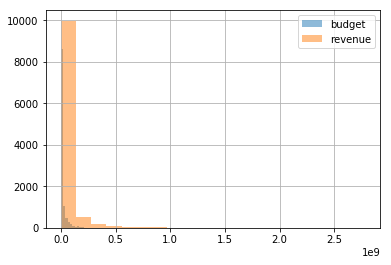

In [60]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df_movies['budget'].hist(alpha=0.5,bins=20,label='budget')
df_movies['revenue'].hist(alpha=0.5,bins=20,label='revenue')
plt.legend();

From the histogram above we can see that revenue was skewed to the right with the total revenue exceeding the budget and as such the movies sold made alot of profit for the companies.

 Research Question 2  (Which revenue had the highest vote count? )

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


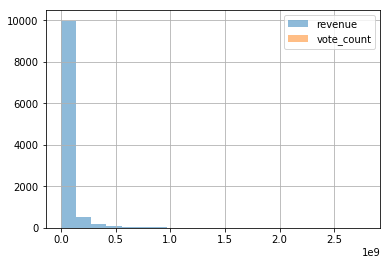

In [61]:
df_movies['revenue'].hist(alpha=0.5,bins=20,label='revenue')
df_movies['vote_count'].hist(alpha=0.5,bins=20,label='vote_count')
plt.legend();

From the dataset above I discouvered that revenue and vote count was skewed to the right, thus the highest vote count had the highest revenue.

 Research Question 3  (Which genre had the highest vote count and revenue? )

In [ ]:
#sns.boxplot.revenue(data=df_movies,x='genres',y='vote_count')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])